In [3]:
import numpy as np
olcumler = np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,145,
                     127,244,163,114,145,65,112,185,202,146,203,224,203,114,
                     188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,
                     84,251,173,131,207,121,120])

In [26]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [5]:
import scipy.stats as stats

In [6]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [8]:
##mean__154.38 170'den farklı ancak bu durum şansa oluşmuş olabilirr
#Amacımız bunu test etmek

In [10]:
##VARSAYIMLAR
#Normallik Varsayimi 1)Grafik yontemler 2)Bazi testler

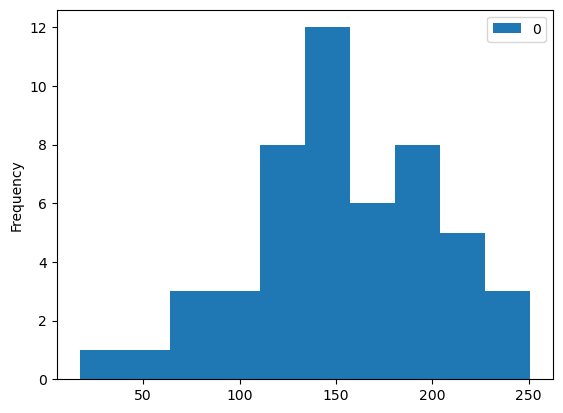

In [15]:
##HISTOGRAM
import pandas as pd
pd.DataFrame(olcumler).plot.hist(); ##Histogram_pendas icinde kayitli

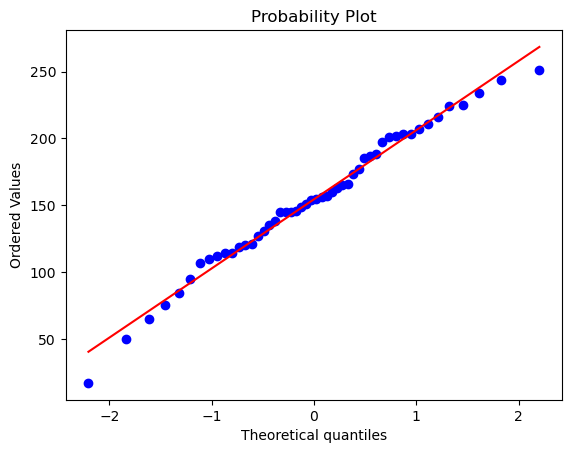

In [19]:
##QQPLOT__sol taraf ornek dagilimi__aLT taraf teorik dagilim benzerlik icin
#kirmizi cizgi etrafına toplanmalilar
import pylab
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()


In [ ]:
##Shapiro-Wilks Testi(hipotez testi icinde test)(normallik varsayimi testi)
H0: Ornek dagilimi ile teroik normal dagilima rasinda istatistiksel olarak anlamli bir farklilk yoktur

H1: .....farklilik vardır.

In [20]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

In [21]:
#Cıktının duzgun olmasi icin;
print("T Hesap İstatistigi: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-Value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistigi: 0.9853101372718811
Hesaplanan P-Value: 0.7848551869392395


In [22]:
#Sol tarafta yer alan deger "test istatistigi" 
#sag tarafta yer alan deger "p-value"
#"p-value" < 0.05 ise H0 reddedilyor. Degilse reddedilemez
##Durumua gore H0 sifir reddedilemez. Yani ornek dagilimi ve teorik daiglim arasinda anlamli bir 
#farkllik yoktur.Yani normallik varsayimi tamamdir.TESTE DEVAM EDEBİLRİZ

In [24]:
##HIPOTEZ TESTININ UYGULAMASI
stats.ttest_1samp(olcumler,popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [27]:
##  H0: Web sitemizde gecirilen ortalama sure 170'tir.
##  H1: ....degildir.
##p-value < 0.05 oldugundan dolayi H0 hipotezi reddedilir. Yani Web sitesinde geciirlen ortalama sure
# 170 degildir. Ornekten elde edilen deger 154 civarı. Ortalama sure 170'den kucuktur. 

In [31]:
###   NONPARAMETRİK TEK ORNEKLEM TESTI ###
#Varsayım sağlanmadı.Yani ornek ve teorik dagilim da anlamli farklilik var.
from statsmodels.stats.descriptivestats import sign_test #isaret testi
sign_test(olcumler,170)

(-7.0, 0.06490864707227217)

In [32]:
## Yukarida sol taraf "test istatistigi"
#sag taraf "p-value"
print("T Hesap İstatistigi: " + str(sign_test(olcumler,170)[0]))
print("Hesaplanan P-Value: " + str(sign_test(olcumler,170)[1]))

T Hesap İstatistigi: -7.0
Hesaplanan P-Value: 0.06490864707227217


In [33]:
## p-value < 0.05 degil. Normmalde reddedilemez. Ancak biz ornek olarka yaptık